# Special Day Analysis

### Contents :

Take into account that the number of products in each category may influence the reviews
- [✔] Consider the average review number for the product in each category 
- [✔] Consider the median review number for the product in each category 


Special day analysis in different categoties
- [✔] Special  day rating and review for different categories
- [✔] Compare Special day rating and review quantity with year's average 
- [✔] International Healthy Day
- [✔] Christmas Day
- [✔] Black Friday



In [1]:
# Math Packages
import math
import pandas as pd
import numpy as np

# Plot Packages 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Other Packages 
import datetime
# from datetime import * 
from statsmodels.tsa.seasonal import seasonal_decompose

In [2]:
# File path
DATA_FOLDER = "./data/"
META_HEALTH_CARE = "health_metadata.pkl"
REVIEWS_HEALTH_CARE = "health_review.pkl"
HEALTH_CARE = "health_merge.pkl"

###  Health merge

#### 1.1 Load the dataset

In [3]:
df_health_merge_review = pd.read_pickle(DATA_FOLDER + HEALTH_CARE)
df_health_merge_review.head(3)

,asin,helpful,overall,reviewText,ReviewTime,title,related,salesRank,categories,price,brand
0,0077614992,"[0, 0]",5,This book was a requirement for a college clas...,2013-02-15,Principles of Mgmt + Oper-CSUF Custom C,"{'also_bought': ['0471730726', '0132834871', '...",{'Health & Personal Care': 168429},[[Health & Personal Care]],0.00,NaN
1,0615208479,"[0, 0]",5,This is a great gift for anyone who wants to h...,2008-12-01,Brain Fitness Exercises Software,NaN,{'Health & Personal Care': 1346973},"[[Health & Personal Care, Personal Care]]",0.00,NaN
2,0615269990,"[0, 0]",5,Very helpful in learning about different disea...,2014-04-06,Occam's Razor,"{'also_bought': ['1935660152', '0071743979', '...",{'Toys & Games': 110575},"[[Health & Personal Care, Personal Care, Shavi...",34.99,NaN


#### 1.2 Split the category into several **sub-categories**.  

- For example, Split [ ['Health & Personal Care',
  'Personal Care',
  'Shaving & Hair Removal',
  'Manual Shaving'] ] into 4 class  
- 1st category is : 'Health & Personal Care'  
- 2nd category is : 'Personal Care'  
- 3rd category is : 'Shaving & Hair Removal'  
- 4th category is : 'Manual Shaving'

In [4]:
df_health_merge_review.categories[2]

[['Health & Personal Care',
  'Personal Care',
  'Shaving & Hair Removal',
  'Manual Shaving']]

In [5]:
# split the category into several sub-categories
health_cat = df_health_merge_review.categories.apply(lambda x : x[0]).values.tolist()
df_health_category = pd.DataFrame(health_cat)
df_health_category.columns = ['1st','2nd','3rd','4th','5th','6th','7th']
df_health_category.head()

,1st,2nd,3rd,4th,5th,6th,7th
0,Health & Personal Care,None,None,None,None,None,None
1,Health & Personal Care,Personal Care,None,None,None,None,None
2,Health & Personal Care,Personal Care,Shaving & Hair Removal,Manual Shaving,None,None,None
3,Health & Personal Care,Personal Care,Shaving & Hair Removal,Manual Shaving,None,None,None
4,Health & Personal Care,Personal Care,Shaving & Hair Removal,Manual Shaving,None,None,None


⬆Since the 1st sub-categories always is ```Health & Personal Care```, we would like to analyze the 2nd sub-categories, and find the average rating and review quantity through years based on this.

####  1.3 Missing rate of 2nd sub-categories

- First, we calcalate the missing rate of 2nd sub-categories. If the missing rate is small we can ignore it since it will have not influnce to out analysis.

In [6]:
# None value rate 
missing_2nd = df_health_category[df_health_category.iloc[:,1].isnull()]['1st'].count()/df_health_category.shape[0]
print( 'Missing rate of 2nd sub-categories is {:.2f}%'.format(missing_2nd*100))

Missing rate of 2nd sub-categories is 2.80%


In [7]:
df_health_category.loc[:,'asin'] = df_health_merge_review.asin.values
df_health_category.loc[:,'overall'] = df_health_merge_review.overall.values
df_health_category.loc[:,'time'] = df_health_merge_review.ReviewTime.values

In [8]:
rating_avg = df_health_category.groupby('2nd')[['overall']].mean().sort_values('overall',ascending = False)
review_quantity = df_health_category.groupby('2nd')[['overall']].count().sort_values('overall',ascending = False)

#### 1.4 The number of products in each category may influnce the reviews

 1.4.1 Consider the average review number for product in each category 

In [9]:
# Groupby
grouped_df = df_health_category.groupby('2nd')

In [10]:
# calculate the review quantity for each category
grouped_df.count()[['overall']]

,overall
2nd,
Baby & Child Care,6930
Health Care,538955
Household Supplies,389269
Medical Supplies & Equipment,479393
Personal Care,601372
Sexual Wellness,105925
Sports Nutrition,147730
Stationery & Party Supplies,43883
Vitamins & Dietary Supplements,576541


In [11]:
# calculate the number of products for each category
grouped_df[['asin']].nunique()

,asin
2nd,
Baby & Child Care,823
Health Care,48520
Household Supplies,31324
Medical Supplies & Equipment,30943
Personal Care,39084
Sexual Wellness,18774
Sports Nutrition,9374
Stationery & Party Supplies,11897
Vitamins & Dietary Supplements,47934


In [12]:
# calculate the average review number for product in each category
aver_cate = pd.DataFrame(grouped_df.count()['overall'].divide(grouped_df[['asin']].nunique()['asin']))
aver_cate.columns = ['average_review_number']
aver_cate = aver_cate.sort_values('average_review_number',ascending = False)
aver_cate

,average_review_number
2nd,
Sports Nutrition,15.759548
Medical Supplies & Equipment,15.492777
Personal Care,15.386654
Household Supplies,12.427180
Vitamins & Dietary Supplements,12.027809
Health Care,11.107894
Baby & Child Care,8.420413
Sexual Wellness,5.642111
Stationery & Party Supplies,3.688577


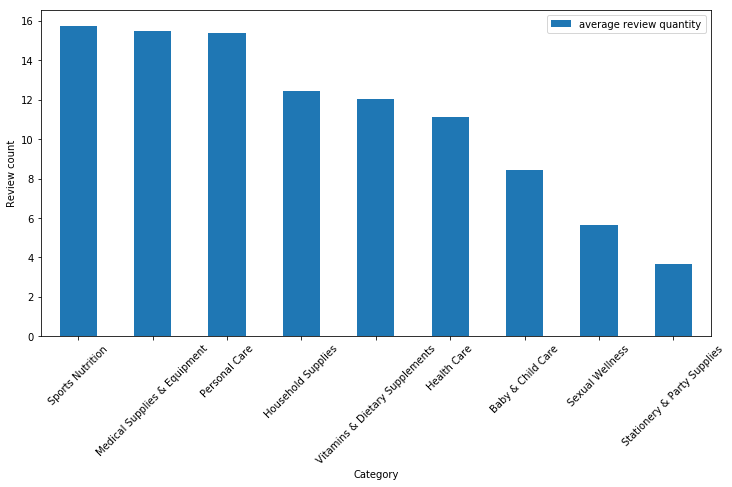

In [13]:
_, ax1 = plt.subplots(figsize = (12,6))
aver_cate.plot.bar(ax=ax1,rot=45)
ax1.legend(labels = ['average review quantity'])
ax1.set_xlabel('Category')
ax1.set_ylabel('Review count')
plt.show()

It is shown that personal product get the largest review quantity and statinary&Party supplies get the smallest review quantity.

 1.4.2 Consider the median review number for product in each category 

In [14]:
df_median = df_health_category.groupby(['2nd','asin']).count()[['overall']]

In [15]:
df_median.head(20)

overall
2nd               asin               
Baby & Child Care 8921422722        3
                  8921422749        1
                  9029300965        2
                  9533223510       24
                  9533225181        2
                  B000052YLR       15
                  B0000537CV        3
                  B0000537CW       23
                  B000067QOX        1
                  B00007EFLB        2
                  B0000867HM        1
                  B00008J2X6        1
                  B000093I6R        1
                  B00009WO05        2
                  B0000VLY2W        6
                  B0000Y3CWY       55
                  B0000Y3DW8        5
                  B00014D74Q       29
                  B00014FUBY        7
                  B0001884XG        1

In [16]:
df_median = df_median.groupby(level=[0]).median()
df_median

,overall
2nd,
Baby & Child Care,2
Health Care,2
Household Supplies,2
Medical Supplies & Equipment,2
Personal Care,2
Sexual Wellness,2
Sports Nutrition,3
Stationery & Party Supplies,1
Vitamins & Dietary Supplements,2


Since the median review quantity for product among categories all are the same, 2, this method is not meanful and we ignore this method.

#### 1.5 Intersted day analysis in different categoties

In [17]:
def special_day_all_categories(df,special_day_name,year,month,day,list_category_name):
    '''
       Plot rating average and review quantity in special day 
        for different categories 
    
       Parameter: 
       df : a dataframe
       special_day_name : special day's name
       year : selected year
       month : the month of special day
       day : the day of special day
       list_category_name : a name list of category 
    '''
    # A week
    date = datetime.datetime.strptime(str(year)+'-'+str(month)+'-'+str(day),"%Y-%m-%d")
    delta = datetime.timedelta(days=7)
    date_period = date+delta
    
    fig, ax = plt.subplots(2,1,figsize = (12,18))

    N = len(list_category_name)
    width = 0.26

    special_day = df[(df['time'] >= date) & (df['time'] < date_period)]
    special_year = df[df.time.dt.year == year]

    year_len = len(df[df.time.dt.year == year].time.unique())
    
    i_day = special_day.groupby('2nd')[['overall']].mean()
    i_day = i_day[i_day.index.isin(list_category_name)]
    i_year = special_year.groupby('2nd')[['overall']].mean()
    i_year = i_year[i_year.index.isin(list_category_name)]

    ind = np.arange(i_day.shape[0])
    ax[0].bar(ind,i_day.overall.values.tolist(),width,color ='C0')
    ax[0].bar(ind+width,i_year.overall.values.tolist(),width,color ='C1')
    ax[0].legend(labels=[special_day_name,'Day average rating in related year'])
    ax[0].set_xticks(ind+width/2)
    ax[0].set_xticklabels( i_day.index.values.tolist(), rotation=20 )
    ax[0].set_ylim(2.0,4.5)
    ax[0].set_ylabel('Rating average')
    ax[0].set_title('Rating average for each category in ' +special_day_name)

    # Review quantity
    i_day_q = special_day.groupby('2nd')[['overall']].count()/7
    i_day_q = i_day_q[i_day_q.index.isin(list_category_name)]
    i_year_q = special_year.groupby('2nd')[['overall']].count()/year_len
    i_year_q = i_year_q[i_year_q.index.isin(list_category_name)]


    ind_q = np.arange(i_day_q.shape[0])
    ax[1].bar(ind_q,i_day_q.overall.values.tolist(),width,color ='C0')
    ax[1].bar(ind_q+width,i_year_q.overall.values.tolist(),width,color ='C1')
    ax[1].set_xticks(ind+width/2)
    ax[1].set_xticklabels(i_day_q.index.values.tolist(), rotation=20 )
    ax[1].legend(labels=[special_day_name,'Day average review quantity in related year'])
    ax[1].set_ylabel('Review quantity')
    ax[1].set_title('Review quantity for each category in ' +special_day_name)

    plt.show()

In [18]:
# special_day_name = 'International health day'
# month = 4
# day = 7
# year = 2012
# df = df_health_category
# list_category_name = df_median.index.values.tolist()

# # A week
# date = datetime.datetime.strptime(str(year)+'-'+str(month)+'-'+str(day),"%Y-%m-%d")
# delta = datetime.timedelta(days=7)
# date_period = date+delta


# fig, ax = plt.subplots(2,1,figsize = (12,18))

# N = len(list_category_name)
# width = 0.26

# special_day = df[(df['time'] >= date) & (df['time'] < date_period)]
# special_year = df[df.time.dt.year == year]

# year_len = len(df[df.time.dt.year == year].time.unique())

# # Rating average
# i_day = special_day.groupby('2nd')[['overall']].mean()
# i_day = i_day[i_day.index.isin(list_category_name)]
# i_year = special_year.groupby('2nd')[['overall']].mean()
# i_year = i_year[i_year.index.isin(list_category_name)]

# ind = np.arange(i_day.shape[0])
# ax[0].bar(ind,i_day.overall.values.tolist(),width,color ='C0')
# ax[0].bar(ind+width,i_year.overall.values.tolist(),width,color ='C1')
# ax[0].legend(labels=[special_day_name,'Day average rating in related year'])
# ax[0].set_xticks(ind+width/2)
# ax[0].set_xticklabels( i_day.index.values.tolist(), rotation=20 )
# ax[0].set_ylim(2.0,4.5)
# ax[0].set_ylabel('Rating average')
# ax[0].set_title('Rating average for each category in ' +special_day_name)

# # Review quantity
# grouped_df = special_day.groupby('2nd')
# i_day_q = grouped_df.count()['overall'].divide(grouped_df[['asin']].nunique()['asin'])/7
# i_day_q = i_day_q[i_day_q.index.isin(list_category_name)]

# # i_day_q = special_day.groupby('2nd')[['overall']].count()/7

# grouped_df_year = special_year.groupby('2nd')
# i_year_q = grouped_df_year.count()['overall'].divide(grouped_df_year[['asin']].nunique()['asin'])/year_len
# i_year_q = i_year_q[i_year_q.index.isin(list_category_name)]


# ind_q = np.arange(i_day_q.shape[0])
# ax[1].bar(ind_q,i_day_q.values.tolist(),width,color ='C0')
# ax[1].bar(ind_q+width,i_year_q.values.tolist(),width,color ='C1')
# ax[1].set_xticks(ind+width/2)
# ax[1].set_xticklabels(i_day_q.index.values.tolist(), rotation=20 )
# ax[1].legend(labels=[special_day_name,'Day average review quantity in related year'])
# ax[1].set_ylabel('Review quantity')
# ax[1].set_title('Review quantity for each category in ' +special_day_name)

# plt.show()

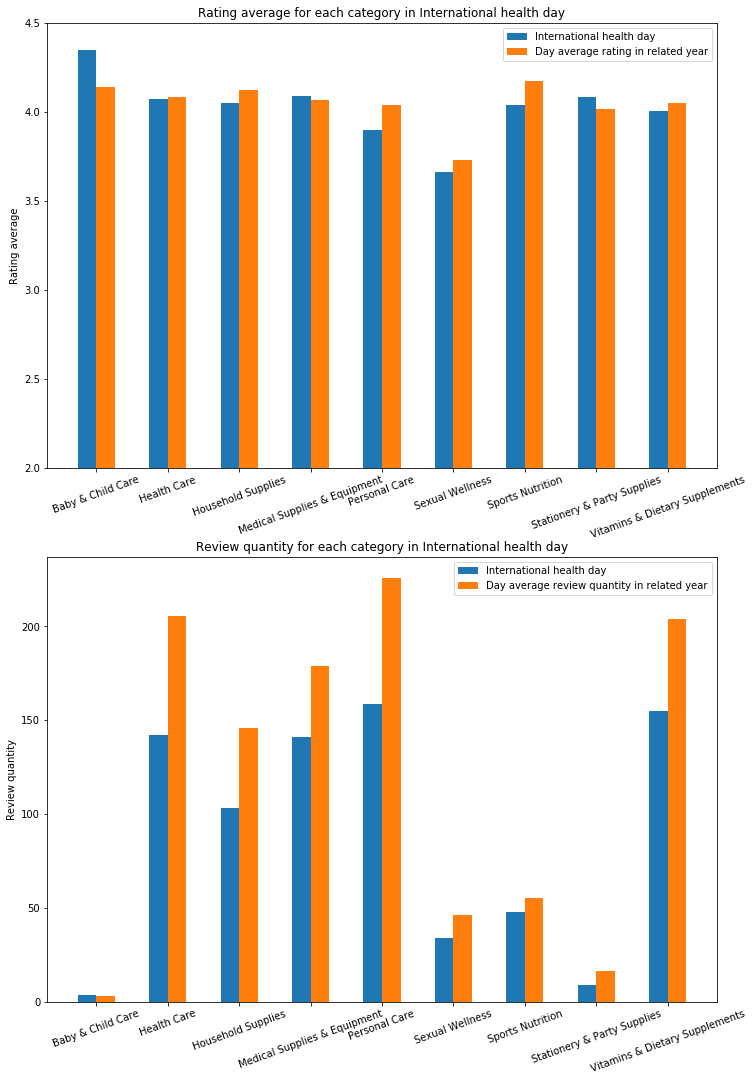

In [19]:
special_day_name = 'International health day'
month = 4
day = 7
year = 2012
df = df_health_category.copy()
list_category_name = df_median.index.values.tolist()
special_day_all_categories(df,special_day_name,year,month,day,list_category_name)

In [20]:
def special_day(df,special_day_name,month,day):
    
    '''
       Plot rating trend and review quantity in special day 
       between 2004-2014 among all categories
    
       Parameter: 
       df : a dataframe
       special_day_name : special day's name
       month : month of special day
       day : day of special day
    '''
    fig, ax = plt.subplots(2,1,figsize = (12,12))
    
    # a week
    df['month-day'] = df['time'].apply(lambda x: x.strftime('%m-%d'))
    date = datetime.datetime.strptime(str(month)+'-'+str(day),"%m-%d")
    delta = datetime.timedelta(days=7)
    
    date_period = (date+delta).strftime('%m-%d')
    date_period_month = (date+delta).strftime('%m')
    date_start  = date.strftime('%m-%d')
    date_start_month  = date.strftime('%m')
    
    
    if date_start_month <= date_period_month:
        special_day = df[(df['month-day']<date_period)&(df['month-day']>=date_start)]
    else:
        special_day = df[((df['month-day']>=date_start))&(df['month-day']<='12-31')|(df['month-day']<date_period)]
    intersted_category = df.copy()

    # Rating average 
    d = special_day.groupby(special_day.time.dt.year)[['overall']].mean()
    d = d.loc[(d.index>2003)& (d.index<2014)]
    d.index = d.index.astype('int')
    d[(d.index>2003) & (d.index<2014)].plot(ax=ax[0])

    inter = intersted_category.groupby(intersted_category.time.dt.year)[['overall']].mean()
    inter = inter.loc[(inter.index>2003) & (inter.index<2014)]
    inter.index = inter.index.astype('int')
    inter[(inter.index>2003) & (inter.index<2014)].plot(ax=ax[0])

    ax[0].legend(labels=[special_day_name,'Day average rating in related year'])
    ax[0].set_xlabel('Year')
    ax[0].set_ylabel('Rating average')
    ax[0].set_title('Rating change among all categories in ' +special_day_name+ ' through years')


    # Reviw quantity
    d_q = special_day.groupby(special_day.time.dt.year)[['overall']].count()/7
    d_q = d_q.loc[(d_q.index>2003) & (d_q.index<2014)]
    d_q.index = d_q.index.astype('int')
    d_q[(d_q.index>2003) & (d_q.index<2014)].plot(ax=ax[1])

    inter_q  = intersted_category.groupby(intersted_category.time.dt.year)[['overall']].count()/365
    inter_q  = inter_q.loc[(inter_q.index>2003) & (inter_q.index<2014)]
    inter_q.index = inter_q.index.astype('int')
    inter_q[(inter_q.index>2003) & (inter_q.index<2014)].plot(ax=ax[1])

    ax[1].legend(labels=[special_day_name,'Day average review quantity in related year'])
    ax[1].set_xlabel('Year')
    ax[1].set_ylabel('Review quantity')
    ax[1].set_title('Review quantity among all categories in ' +special_day_name+ ' through years')

    plt.show()
    return fig

**International health day**

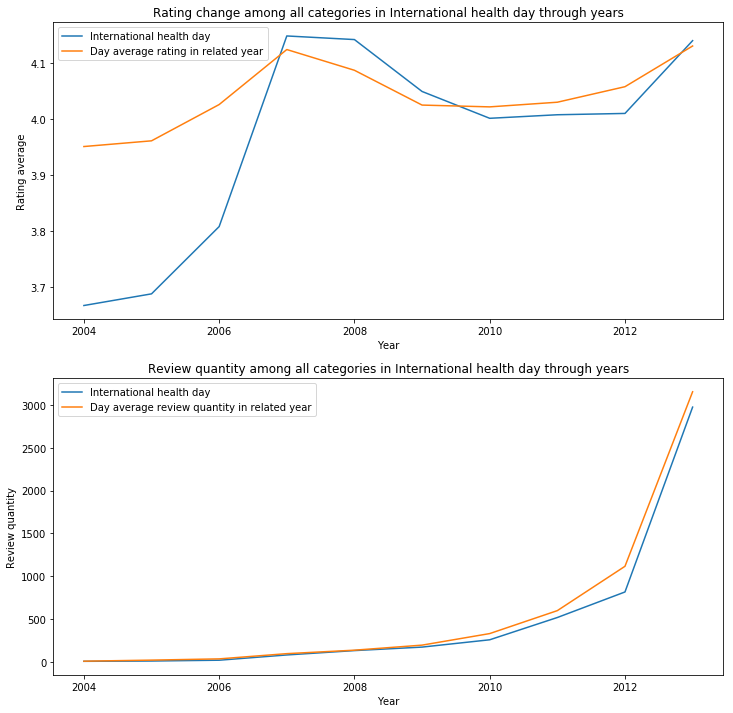

In [21]:
special_day_name = 'International health day'
month = 4
day = 7
df = df_health_category.copy()
cat_name = rating_avg.index.values.tolist()[0]
fig3 = special_day(df,special_day_name,month,day)

**Christmas Day**

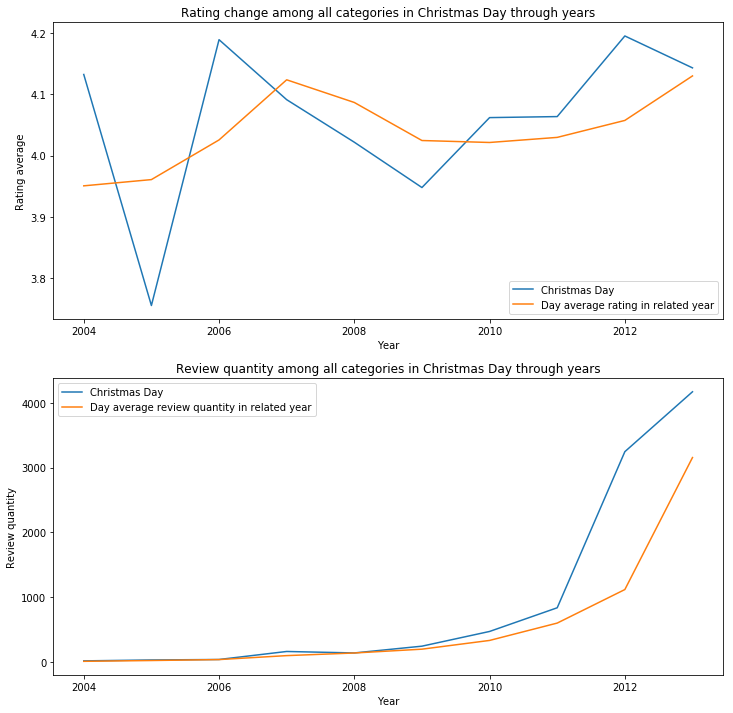

In [22]:
special_day_name = 'Christmas Day'
month = 12
day = 25
df = df_health_category.copy()
cat_name = rating_avg.index.values.tolist()[0]
fig1 = special_day(df,special_day_name,month,day)

**Black Friday**

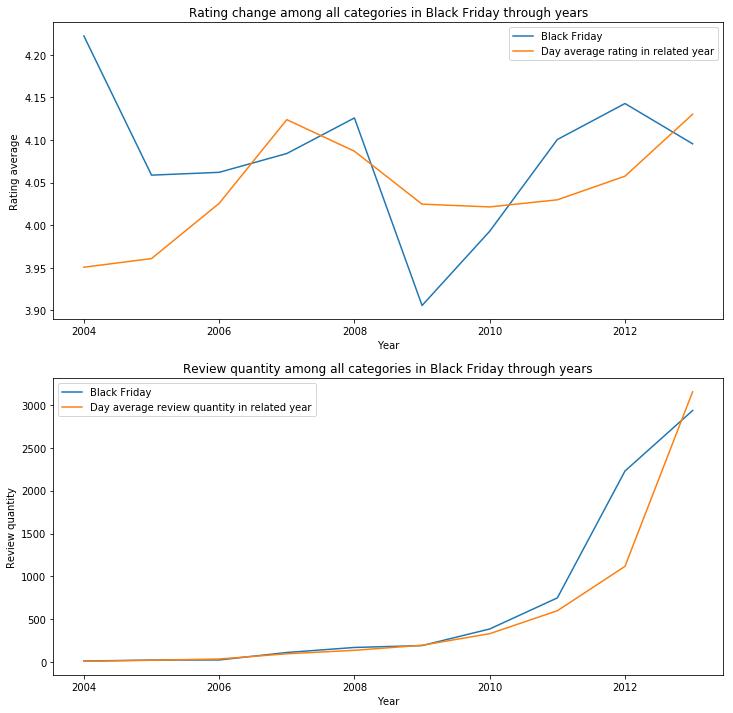

In [23]:
special_day_name = 'Black Friday'
month = 11
day = 23
df = df_health_category.copy()
cat_name = rating_avg.index.values.tolist()[0]
fig2 = special_day(df,special_day_name,month,day)

```Explantion```

After observing above three ling chart figure in three special day, International health day, Christmas Day, Black Friday, It is obvious that the number of review increasing dramatically in these three days but their average rating fluctuate comparing year's avearge raing through 2004-2013